In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"

In [63]:
%cd /content/drive/My Drive/kaggle

/content/drive/My Drive/kaggle


In [64]:
# urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [65]:
!pwd

/content/drive/My Drive/kaggle


In [66]:
from fastai import *
from fastai.vision import *
import numpy as np

In [5]:
folder = 'black'
file = 'urls_black.txt'

In [6]:
folder = 'teddy'
file = 'urls_teddy.txt'

In [7]:
folder ='grizzly'
file ='urls_grizzly.txt'

In [67]:
path = Path('/content/drive/My Drive/kaggle/bears')
dest = path/folder
dest.mkdir(parents = True, exist_ok = True)

In [68]:
classes = ['black', 'teddy', 'grizzly']

In [ ]:
download_images(path/file, dest, max_pics=200)

In [ ]:
??download_images

In [20]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_size=500)

black


teddy


grizzly


In [21]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2, ds_tfms = get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [22]:
data.classes

['black', 'grizzly', 'teddy']

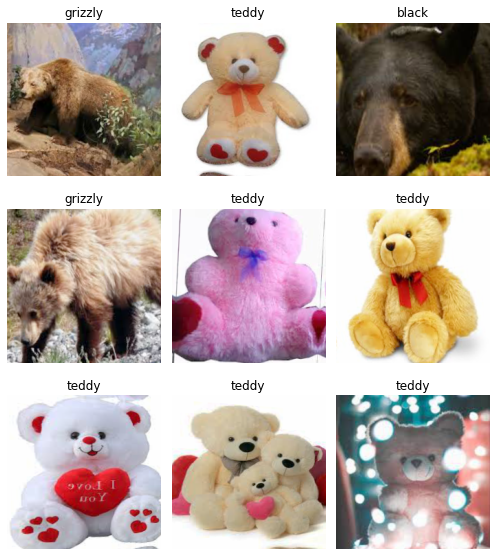

In [23]:
data.show_batch(rows=3, figsize=(7,8))

In [24]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddy'], 3, 416, 104)

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [26]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.248549,0.060850,0.028846,00:05
1,0.692262,0.060690,0.028846,00:05
2,0.465071,0.051712,0.028846,00:05


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [27]:
learn.save('stage-1')

In [28]:
learn.unfreeze()

In [31]:
learn.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


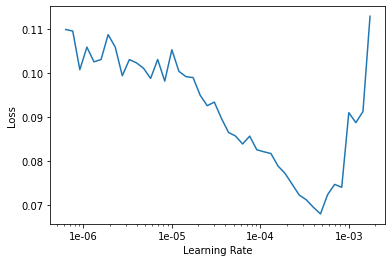

In [32]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(2, max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.074945,0.094713,0.028846,00:05
1,0.066968,0.053906,0.028846,00:06


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [36]:
learn.save('stage-2')

In [ ]:
learn.load('stage-1')

In [38]:
interp= ClassificationInterpretation.from_learner(learn)

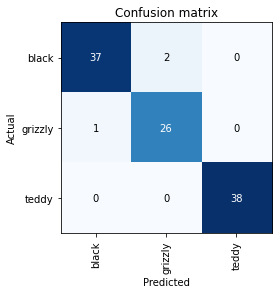

In [39]:
interp.plot_confusion_matrix()

# Cleaning Data

In [40]:
from fastai.widgets import *

losses, idxs = interp.top_losses()
top_plot_paths = data.train_ds.x[idxs]

In [76]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch())

In [77]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [78]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [79]:


# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)



Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [42]:
interp.most_confused(min_val=2)

[('black', 'grizzly', 2)]

In [80]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [81]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

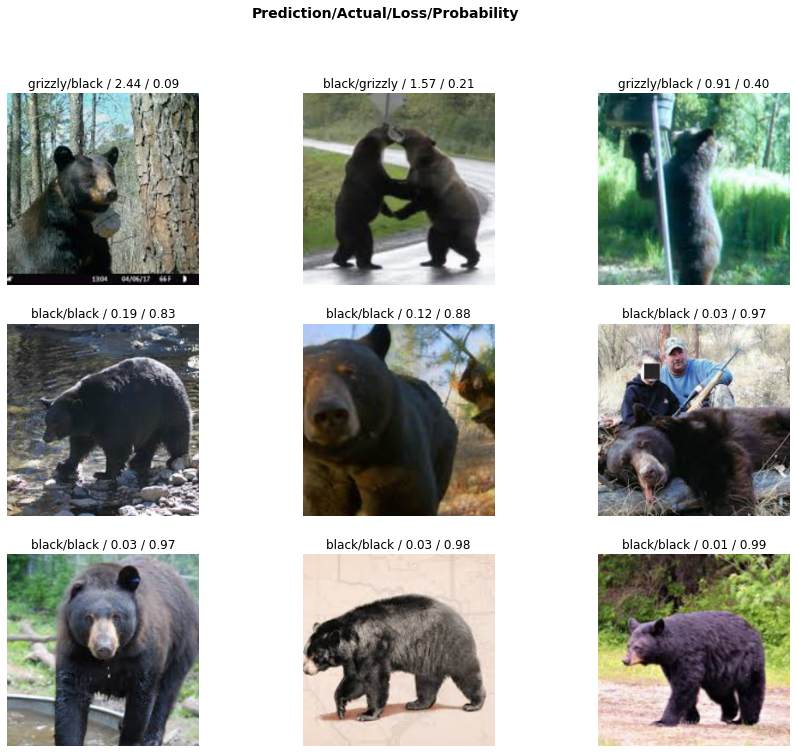

In [43]:
interp.plot_top_losses(9, figsize=(15,12))

# putting Your model in production

In [82]:
learn.export()

In [83]:
defaults.device = torch.device('cpu')

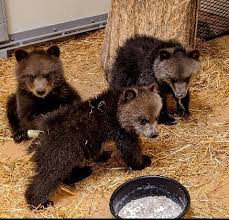

In [84]:
img = open_image(path/'grizzly/00000020.jpg')
img

In [85]:
learn = load_learner(path)

In [ ]:
classes = ['black', 'grizzly', 'teddy']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms= get_transforms(), size=224).normalize(imagenet_stats)
learn = cnn_learner(data2, models.resnet34, metrics=error_rate)
learn.load('stage-2')

In [88]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'grizzly'

In [90]:
pred_idx

tensor(1)

In [75]:
outputs

tensor([1.4796e-04, 9.9897e-01, 8.8043e-04])